# The objective of the project is to learn how to implement a simple image classification pipeline based on a deep neural network. The goals of this project are as follows:-

1.) Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages) 

2.) Data fetching and understand the train/test splits. (5 points)

3.) Implement and apply a deep neural network classifier (including feedforward neural network, RELU, activations) (10 points)

4.) Implement batch normalization for training the neural network (5 points) 

5.) Print the classification accuracy metrics (10 points)

###### 1.) Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)

In [15]:
#Importing Necessary Libraries 
import h5py
import numpy as np
import tensorflow as tf
tf.__version__

'2.0.0'

###### 2.) Data fetching and understanding the train/test splits.

In [9]:
#Open the file as readonly 
h5f = h5py.File('SVHN_single_grey1.h5')

In [10]:
#Load the training, test and Validation Set
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test  = h5f['X_test'][:]
y_test  = h5f['y_test'][:]

In [11]:
#Close The file
h5f.close()

In [12]:
#Printing the test & train data shape
print ("shape of test features", X_test.shape)
print ("shape of train features",X_train.shape)
print ("shape of test labels",y_test.shape)
print ("shape of train labels",y_train.shape)

shape of test features (18000, 32, 32)
shape of train features (42000, 32, 32)
shape of test labels (18000,)
shape of train labels (42000,)


In [13]:
# Converting labels to categorical variables 
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [14]:
trainY[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

###### 3.) Implement and apply a deep neural network classifier (including feedforward neural network, RELU, activations)

In [16]:
#Importing Keras from tensorflow & Subsequent packages that are required . 
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [17]:
#Feed forward network implemenation with Relu activation function
model = tf.keras.models.Sequential()

In [18]:
#Reshape data from 2D to 1D -> 32X32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32)))

In [19]:
#Reshape data from 2D to 1D -> 32x32 to 1024
model.add(tf.keras.layers.Reshape((1024,),input_shape=(32,32,)))

###### 4.) Implement batch normalization for training the neural network

In [20]:
#Normalize the data
model.add(tf.keras.layers.BatchNormalization()) # adding batch normalisation layer

In [21]:
#Adding hidden layers
model.add(tf.keras.layers.Dense(200, activation='relu'))

model.add(tf.keras.layers.Dense(100, activation='relu'))

model.add(tf.keras.layers.Dense(80, activation='relu'))

model.add(tf.keras.layers.Dense(60, activation='relu'))

model.add(tf.keras.layers.Dense(30, activation='relu'))

In [22]:
#Adding OUTPUT layer
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [23]:
#Compiling the model with SGD optimizer & Categorical Cross Entopy loss.
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
#ModelSummary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 1024)              0         
_________________________________________________________________
reshape_1 (Reshape)          (None, 1024)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 1024)              4096      
_________________________________________________________________
dense (Dense)                (None, 200)               205000    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_3 (Dense)              (None, 60)                4

In [25]:
#Train the model
model.fit(X_train,trainY,epochs=30,batch_size=32)

Train on 42000 samples
Epoch 1/30
42000/42000 [==============================] - 7s 173us/sample - loss: 2.0160 - accuracy: 0.2786
Epoch 2/30
42000/42000 [==============================] - 6s 142us/sample - loss: 1.2825 - accuracy: 0.5876
Epoch 3/30
42000/42000 [==============================] - 6s 143us/sample - loss: 1.0415 - accuracy: 0.6691
Epoch 4/30
42000/42000 [==============================] - 6s 142us/sample - loss: 0.9174 - accuracy: 0.7086
Epoch 5/30
42000/42000 [==============================] - 6s 142us/sample - loss: 0.8487 - accuracy: 0.7311
Epoch 6/30
42000/42000 [==============================] - 6s 143us/sample - loss: 0.7860 - accuracy: 0.7517
Epoch 7/30
42000/42000 [==============================] - 6s 142us/sample - loss: 0.7362 - accuracy: 0.7677
Epoch 8/30
42000/42000 [==============================] - 6s 143us/sample - loss: 0.7064 - accuracy: 0.7761
Epoch 9/30
42000/42000 [==============================] - 6s 144us/sample - loss: 0.6788 - accuracy: 0.7854
Epoch

In [26]:
#Model Accuracy
acc=model.evaluate(X_test,testY)

18000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [27]:
print("model accuracy",acc)

model accuracy [0.5479897668759028, 0.84394443]


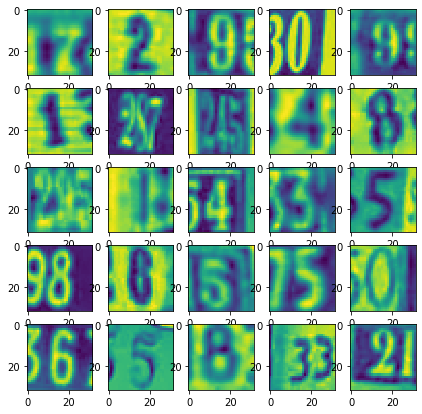

In [36]:
#Visualizing the data 
%matplotlib inline
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(7, 7))
columns = 5
rows = 5
for i in range(1, columns*rows +1):
    img = X_test[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

In [49]:
# Model Prediction
y_pred=model.predict_classes(X_test)
y_pred

array([1, 7, 2, ..., 7, 9, 2], dtype=int64)

###### Classification Metrics For Test Data

In [50]:
from sklearn import metrics
cr=metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      1814
           1       0.84      0.87      0.85      1828
           2       0.89      0.83      0.86      1803
           3       0.82      0.78      0.80      1719
           4       0.89      0.86      0.88      1812
           5       0.79      0.87      0.83      1768
           6       0.86      0.83      0.84      1832
           7       0.84      0.90      0.87      1808
           8       0.86      0.78      0.82      1812
           9       0.85      0.82      0.83      1804

    accuracy                           0.84     18000
   macro avg       0.85      0.84      0.84     18000
weighted avg       0.85      0.84      0.84     18000



In [51]:
print("Confusion Matrix\n\n", confusion_matrix(y_test,y_pred))

Confusion Matrix

 [[1635   24   11   16   18   15   22   29   14   30]
 [  37 1588   28   26   42   10   12   61    9   15]
 [  27   24 1497   35   24   18    7   86   33   52]
 [  37   45   27 1344   12  141   13   40   33   27]
 [  44   49   25   22 1561   14   31   18   13   35]
 [  25   13   15   68   10 1535   42   11   27   22]
 [  65   31   11   18   27   83 1512   17   53   15]
 [  21   53   22   25   15   11    4 1635    9   13]
 [  69   32   20   41   15   54   96   17 1410   58]
 [  90   38   17   38   23   57    9   27   31 1474]]


###### Observations :-
-DNN implementation with batch normalisation, relu as activation function, categorical cross entopy as loss function, and with 30 epochs , we are seeing an accuracy of 85% on test data.

-Training & testing time are very less.

-Testing accuracy is around 84%. So, it is generalising very well.

-Precision and accuracy scores from the classification metrics are good.